# Avocados: A Passion Project

                                                                                    Kalina Huynh
                                                                                    kalinahuynh@berkeley.edu

Avocados have been around forever, however society seems to have just recently discovered them. Perhaps it was a result of the famous meme of the toddler opening up a gift to which he happily replied, "It's an avocado, thanks!" Ever since then, trendy cafes charge around $10 for a slice of avocado toast. Critics hypothesize that there is a direct correlation of the amount of avocado toast millenials are purchasing and whether or not they own a home.

In all seriousness, this juptyer notebook exhibits my skills of:
EDA, python, pandas, numpy, seaborn, matplotlib, data visualization, and more...

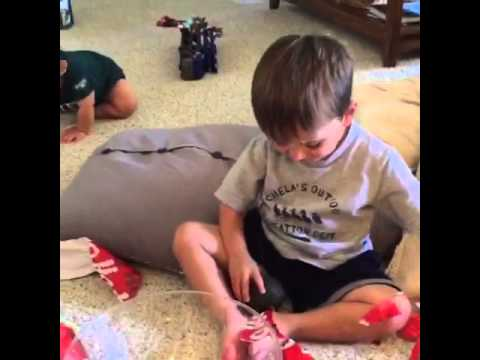

In [58]:
YouTubeVideo(id='wG2-y5Yf1Oo', width=500, height=300)

In [59]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import YouTubeVideo

pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [60]:
avo = pd.read_csv('avocado.csv').drop(columns='Unnamed: 0')
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [61]:
avo['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [62]:
convt = avo[avo['type'] == 'conventional']
convt.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [63]:
org = avo[avo['type'] == 'organic']
org.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany


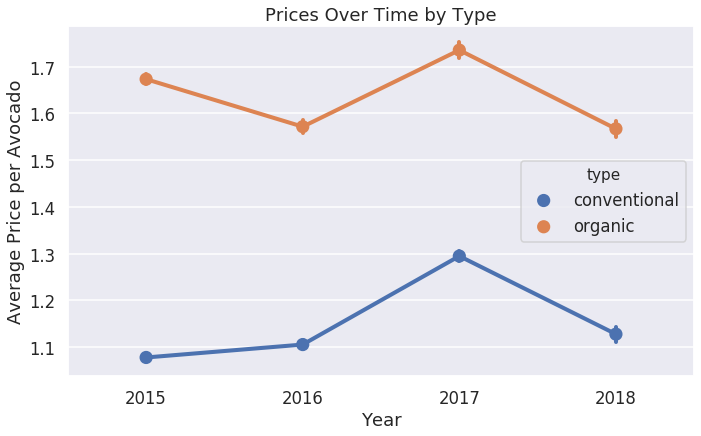

In [64]:
plt.figure(figsize=[10, 6])
sns.pointplot(x='year', y='AveragePrice', hue='type', data=avo);
plt.xlabel('Year')
plt.ylabel('Average Price per Avocado')
plt.title('Prices Over Time by Type');

Used a point plot to see the change in prices over time of each type of avocado.

It is obvious that organic avocados are more expensive than conventional avocados. In addition to this, the average price per avocado between conventional and organic seems to be directly related, this means as conventional avocado prices increase so do organic avocado prices.

This graph also shows a peak in average price at the beginning of 2017, perhaps this is the peak of avocado trendiness. 

In [65]:
avoAvg = pd.merge(avo, avo.groupby('region').agg({'AveragePrice':'mean'}), how='left', on='region')
avoAvg.head()

,Date,AveragePrice_x,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePrice_y
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1.561036
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1.561036
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1.561036
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1.561036
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1.561036


In [66]:
avgReg = avo.groupby('region').agg({'AveragePrice':'mean'}).reset_index()
avgReg.head()

,region,AveragePrice
0,Albany,1.561036
1,Atlanta,1.337959
2,BaltimoreWashington,1.534231
3,Boise,1.348136
4,Boston,1.530888


Dataframe of regions and their average price per avocado.

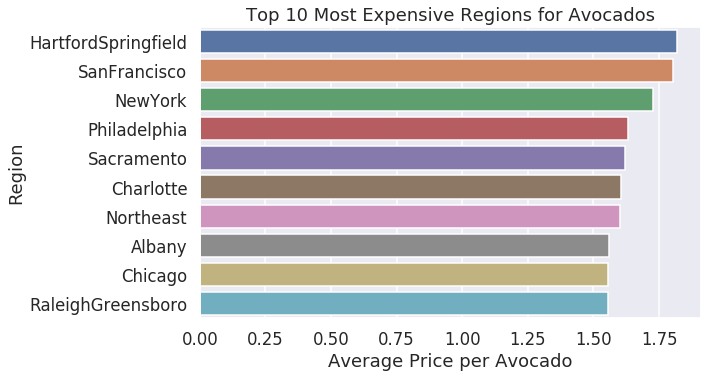

In [67]:
plt.figure(figsize=[8, 5])
sns.barplot(x='AveragePrice', y='region', data=avgReg.sort_values(
    'AveragePrice', ascending=False).head(10));
plt.title('Top 10 Most Expensive Regions for Avocados')
plt.xlabel('Average Price per Avocado')
plt.ylabel('Region');

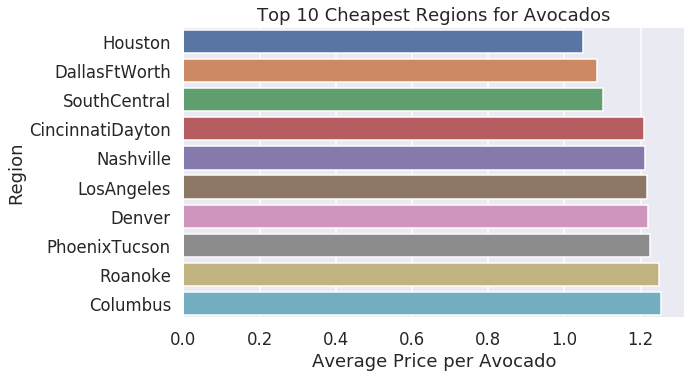

In [134]:
plt.figure(figsize=[8, 5])
sns.barplot(x='AveragePrice', y='region', data=avgReg.sort_values(
    'AveragePrice', ascending=True).head(10));
plt.title('Top 10 Cheapest Regions for Avocados')
plt.xlabel('Average Price per Avocado')
plt.ylabel('Region');

Above I made a graph to illustrate the top 10 most expensive and cheapest regions for avocados. It is not a shocker that avocados purchased in San Francisco, California are almost double the price of avocados in Houston, Texas. Although, another thing to note is that surprisingly Los Angeles, California, a not so inexpensive city, is among the top 10 cheapest regions to purchase avocados, this may be related to its close proximity to Mexico.

In [79]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [100]:
avo.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month            object
dtype: object

In [104]:
avo['month'] = pd.DatetimeIndex(avo['Date']).month_name()
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November


Created a month column, so that I can now create a season column.

In [111]:
seasons = {'December': 'Winter', 'January': 'Winter', 'February': 'Winter', 
           'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
           'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 
           'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn', }

Dictionary of seasons as the keys and months as the values.

In [112]:
avo['season'] = avo['month'].map(seasons)
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Winter
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,Winter
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,Winter
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,Autumn


Avo DF now includes a column for the season.

In [140]:
szn_cnt = avo['season'].value_counts().to_frame().reset_index().rename(columns={'index': 'season', 'season': 'count'})
szn_cnt

,season,count
0,Winter,5075
1,Spring,4752
2,Autumn,4212
3,Summer,4210


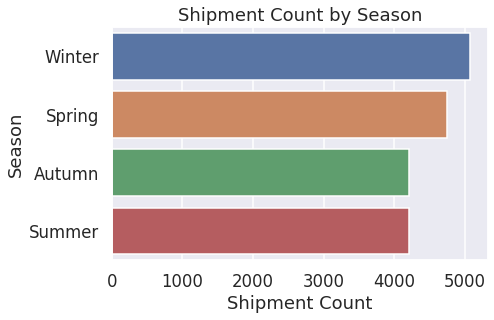

In [143]:
sns.barplot(x='count', y='season', data=szn_cnt);
plt.title('Shipment Count by Season')
plt.xlabel('Shipment Count')
plt.ylabel('Season');

Graph for the shipment count by season.

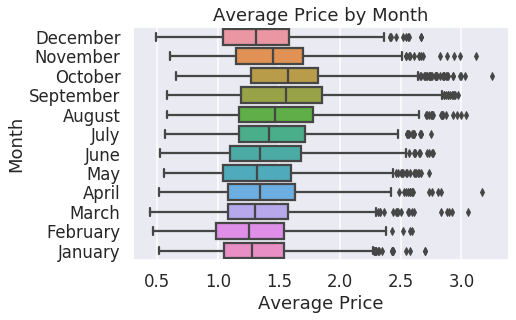

In [137]:
sns.boxplot(x='AveragePrice', y='month', data=avo);
plt.title('Average Price by Month')
plt.xlabel('Average Price')
plt.ylabel('Month');

Boxplot for the average price per avocado by individual month.